In [17]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [47]:
!pip install xlrd

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [60]:
df_ca = pd.read_excel('Canada.xlsx',sheet_name='Canada by Citizenship',skiprows=range(20), skipfooter=2)
df_ca['Total'] = df_ca.iloc[:, 9:43].sum(axis=1)
df_ca.set_index('OdName', inplace=True)
df_ca.head()

,Type,Coverage,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
OdName,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Immigrants,Foreigners,935,Asia,5501,Southern Asia,902,Developing regions,16,39,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Immigrants,Foreigners,908,Europe,925,Southern Europe,901,Developed regions,1,0,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Immigrants,Foreigners,903,Africa,912,Northern Africa,902,Developing regions,80,67,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Immigrants,Foreigners,909,Oceania,957,Polynesia,902,Developing regions,0,1,...,0,1,0,0,0,0,0,0,0,6
Andorra,Immigrants,Foreigners,908,Europe,925,Southern Europe,901,Developed regions,0,0,...,0,1,1,0,0,0,0,1,1,15


## Line plots

AttributeError: Unknown property type

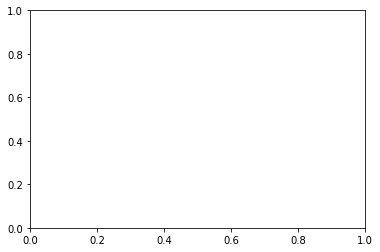

In [62]:
years = list(range(1980,2014))

df_ca.loc['India', years].plot(kind='line')
plt.title('Immigration from India')
plt.ylabel('Number of immegrants')
plt.xlab
